# Case study on Supervised learning

## Do the following in the iris dataset.

1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

### Qn. No. 1. Read the dataset to the python environment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.metrics import mean_squared_error,r2_score,f1_score,confusion_matrix,precision_score,recall_score,accuracy_score

In [2]:
df=pd.read_excel('Desktop\ICTK\Case study # 07 on Supervised learning\iris.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Qn. No. 2. Do necessary pre-processing steps.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.shape

(150, 5)

In [5]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


#### Label Encoding

In [6]:
df['Classification'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Classification, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    df[a[i]]=label_en.fit_transform(df[a[i]])

In [8]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,NaN,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,NaN,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [10]:
df['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

###### Note ; The classification column which is the target variable is label encoded

#### Checking for missing values

In [11]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

#### Plotting frequency

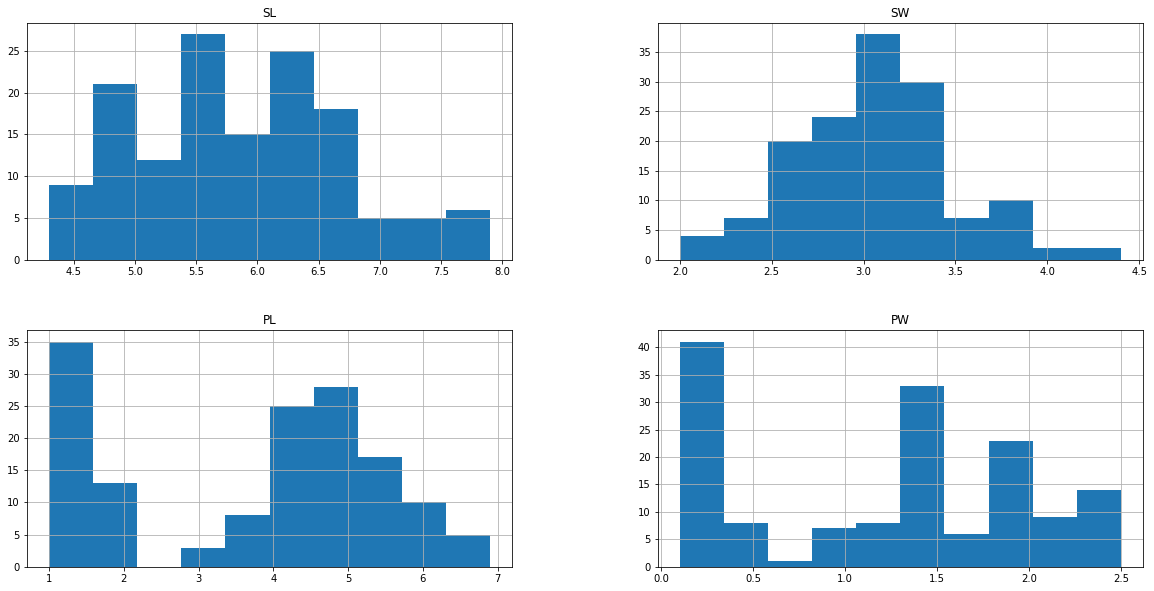

In [12]:
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,10))
plt.show()

#### Filling missing values using KNN Imputer

In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [14]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [15]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

##### Insight
Since KNN imputer helps replace the missing values in each column by comparing them with similar columns, this method is more efficient than using the mean, median, or mode to fill the missing values.

### Handling Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2839fcf5be0>,
 'caps': [<matplotlib.lines.Line2D at 0x2839fd052e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2839fcf5880>,
 'medians': [<matplotlib.lines.Line2D at 0x2839fd059a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2839fd05d00>,
 'means': []}

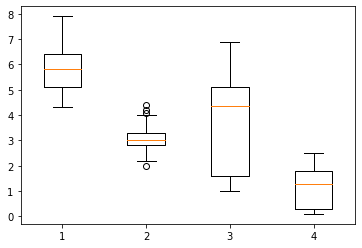

In [16]:
plt.boxplot(df[['SL', 'SW', 'PL', 'PW']])

{'whiskers': [<matplotlib.lines.Line2D at 0x2839fda1a00>,
 'caps': [<matplotlib.lines.Line2D at 0x2839fdb1100>,
 'boxes': [<matplotlib.lines.Line2D at 0x2839fda16a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2839fdb17c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2839fdb1b20>],
 'means': []}

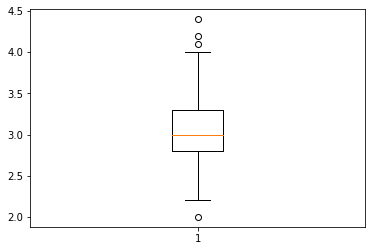

In [17]:
plt.boxplot(df['SW'])

In [18]:
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.8
3.0
3.3
2.05
4.05


In [19]:
outlier=[]
for x in df['SW']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[4.4, 4.1, 4.2, 2.0]

In [20]:
ind=df['SW']<low_lim
df.loc[ind].index

Int64Index([60], dtype='int64')

In [21]:
ind1=df['SW']>up_lim
df.loc[ind1].index

Int64Index([15, 32, 33], dtype='int64')

In [22]:
df.drop([15, 32, 33, 60],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2839f8d1a00>,
 'caps': [<matplotlib.lines.Line2D at 0x2839f8d1b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2839f96f640>,
 'medians': [<matplotlib.lines.Line2D at 0x2839f8d1520>,
 'fliers': [<matplotlib.lines.Line2D at 0x2839f9500d0>,
 'means': []}

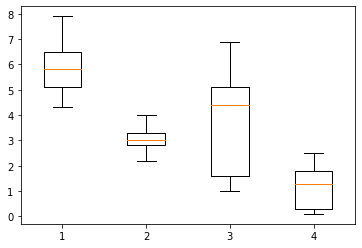

In [23]:
plt.boxplot(df[['SL', 'SW', 'PL', 'PW']])

##### Note; All outliers are removed.

### Feature Engineering

In [24]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [25]:
df['mean']=df[['SL', 'SW', 'PL', 'PW']].mean(axis=1)
df['sum']=df[['SL', 'SW', 'PL', 'PW']].sum(axis=1)
df['skew']=df[['SL', 'SW', 'PL', 'PW']].skew(axis=1)
df['kurt']=df[['SL', 'SW', 'PL', 'PW']].kurt(axis=1)

In [26]:
df.head()

,SL,SW,PL,PW,Classification,mean,sum,skew,kurt
0,5.1,3.5,1.4,0.2,0.0,2.550,10.2,0.189328,-2.368842
1,4.9,3.0,1.4,0.2,0.0,2.375,9.5,0.404389,-1.091924
2,4.7,3.2,1.3,0.2,0.0,2.350,9.4,0.208782,-2.276657
3,4.6,3.1,1.5,0.2,0.0,2.350,9.4,0.120130,-1.575170
4,5.0,3.6,1.4,0.2,0.0,2.550,10.2,0.090753,-2.787004


In [27]:
df.tail()

,SL,SW,PL,PW,Classification,mean,sum,skew,kurt
145,6.7,3.0,5.2,2.3,2.0,4.300,17.2,0.351514,-2.983606
146,6.3,2.5,5.0,1.9,2.0,3.925,15.7,0.256478,-3.790103
147,6.5,3.0,5.3,2.0,2.0,4.200,16.8,0.085072,-3.407316
148,6.2,3.4,5.4,2.3,2.0,4.325,17.3,-0.146244,-3.387994
149,5.9,3.0,5.1,1.8,2.0,3.950,15.8,-0.185387,-3.345923


In [28]:
df.shape

(146, 9)

##### Notes; Four New features are added :
1) mean, 2) sum, 3) skewness, & 4) kurtosis

### Splitting the data

In [29]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification', 'mean', 'sum', 'skew',
       'kurt'],
      dtype='object')

In [30]:
x=df.drop(['Classification'],axis=1)
y=df['Classification']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
x_train.shape

(116, 8)

In [32]:
x_test.shape

(30, 8)

## Qn. No. 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

### Scaling using MinMax Scaler

In [33]:
from sklearn import preprocessing
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))
x_test= min_max.fit_transform(x_test)
x_train= min_max.fit_transform(x_train)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

##### Notes;
Using MinMax Scaler will preserve the shape of the dataset without distortion since the distribution is not normally distributed for PL and PW as seen from the Frequency plot.

### Building the model using RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [35]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='weighted'))
print("Recall is:",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pred,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9703703703703703
Recall is: 0.9666666666666667
F1 Score is: 0.9667698658410733


In [36]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

In [37]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

PL      19.974455
PW      19.638056
kurt    19.370794
sum     16.080662
mean    14.990560
SL       7.175780
SW       1.470368
skew     1.299326
dtype: float64

### Building the model using Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_predict=gb.predict(x_test)

In [39]:
print("Accuracy is:",accuracy_score(y_test,y_predict))
print("Precision is:",precision_score(y_test,y_predict,average='weighted'))
print("Recall is:",recall_score(y_test,y_predict,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predict,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9703703703703703
Recall is: 0.9666666666666667
F1 Score is: 0.9667698658410733


In [40]:
confusion_matrix(y_test,y_predict)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

### Building the model using Logistic regression

In [41]:
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
log_r.fit(x_train,y_train)
y_preddd=log_r.predict(x_test)

In [42]:
print("Accuracy is:",accuracy_score(y_test,y_preddd))
print("Precision is:",precision_score(y_test,y_preddd,average='weighted'))
print("Recall is:",recall_score(y_test,y_preddd,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_preddd,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9703703703703703
Recall is: 0.9666666666666667
F1 Score is: 0.9667698658410733


In [43]:
confusion_matrix(y_test,y_preddd)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

### Building the model using KNN Model

In [44]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train,y_train)
    y_predic=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predic)
    acc_values.append(acc)

In [45]:
acc_values

[1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

Text(0, 0.5, 'accuracy')

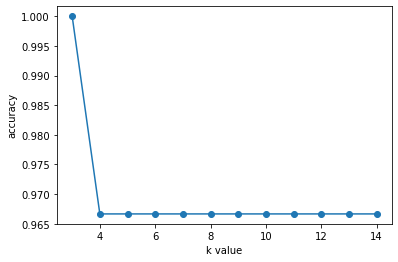

In [46]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [47]:
classifier = KNeighborsClassifier(n_neighbors=6, metric='minkowski')
classifier.fit(x_train,y_train)
y_predic=classifier.predict(x_test)

In [48]:
print("Accuracy is:",accuracy_score(y_test,y_predic))
print("Precision is:",precision_score(y_test,y_predic,average='weighted'))
print("Recall is:",recall_score(y_test,y_predic,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predic,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9703703703703703
Recall is: 0.9666666666666667
F1 Score is: 0.9667698658410733


In [49]:
confusion_matrix(y_test,y_predic)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

### Building the model using Decision Tree Model

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pr=dt.predict(x_test)

In [52]:
print("Accuracy is:",accuracy_score(y_test,y_pr))
print("Precision is:",precision_score(y_test,y_pr,average='weighted'))
print("Recall is:",recall_score(y_test,y_pr,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pr,average='weighted'))

Accuracy is: 0.9333333333333333
Precision is: 0.9333333333333333
Recall is: 0.9333333333333333
F1 Score is: 0.9333333333333333


In [53]:
confusion_matrix(y_test,y_pr)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

### Building the model using SVM Model

In [54]:
from sklearn.svm import SVC

##### Linear SVM

In [55]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pre=svm_linear.predict(x_test)

In [56]:
print("Accuracy is:",accuracy_score(y_test,y_pre))
print("Precision is:",precision_score(y_test,y_pre,average='weighted'))
print("Recall is:",recall_score(y_test,y_pre,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pre,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9703703703703703
Recall is: 0.9666666666666667
F1 Score is: 0.9667698658410733


In [57]:
confusion_matrix(y_test,y_pre)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

##### Polynomial SVM

In [58]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pre1=svm_poly.predict(x_test)

In [59]:
print("Accuracy is:",accuracy_score(y_test,y_pre1))
print("Precision is:",precision_score(y_test,y_pre1,average='weighted'))
print("Recall is:",recall_score(y_test,y_pre1,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pre1,average='weighted'))

Accuracy is: 0.9333333333333333
Precision is: 0.9444444444444445
Recall is: 0.9333333333333333
F1 Score is: 0.9316017316017315


In [60]:
confusion_matrix(y_test,y_pre1)

array([[12,  0,  0],
       [ 0,  6,  2],
       [ 0,  0, 10]], dtype=int64)

##### Radial SVM

In [61]:
svm_rad=SVC(kernel='rbf')
svm_rad.fit(x_train,y_train)
y_pre2=svm_rad.predict(x_test)

In [62]:
print("Accuracy is:",accuracy_score(y_test,y_pre2))
print("Precision is:",precision_score(y_test,y_pre2,average='weighted'))
print("Recall is:",recall_score(y_test,y_pre2,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pre2,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9703703703703703
Recall is: 0.9666666666666667
F1 Score is: 0.9667698658410733


In [63]:
confusion_matrix(y_test,y_pre2)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

### Insights;

    The decision tree model has the highest vaules.
    Accuracy is: 1.0
    Precision is: 1.0
    Recall is: 1.0
    F1 Score is: 1.0
    Hence it is the best model